<a href="https://colab.research.google.com/github/aeyjeyaryan/Machine-Learning/blob/main/Financial%20Crisis%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib


In [ ]:
df = pd.read_csv("/content/PRICE_dataset.csv")

In [ ]:
for i in df.columns:
    if df[i].dtype == 'object':
        df.drop(columns=[i], inplace=True)
    else:
        pass


In [ ]:
df.head()

,Q1_1,Q1_2,Q1_5,Q1_9,Q2_3,Q2_8,Q2_9,Q2_18_j,Q2_19,Q2_20,...,Q8_5G,Q9_2A,Q9_3_1b,Q9_3_2b,Q9_3_3b,Q9_3_4b,Q9_3_5b,Q9_3_6b,Q9_3_7b,Q9_3_8b
0,1,10,230,154.0,50.0,4.0,1.0,NaN,1.0,1.0,...,9200.0,180000.0,20000.0,160000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,10,230,154.0,35.0,7.0,2.0,NaN,2.0,1.0,...,2150.0,64000.0,7000.0,57000.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,10,230,152.0,22.0,1.0,1.0,NaN,2.0,2.0,...,475.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,10,204,190.0,34.0,6.0,2.0,NaN,1.0,1.0,...,800.0,10000.0,2000.0,8000.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,10,204,195.0,42.0,4.0,1.0,NaN,2.0,2.0,...,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.isnull().any()

Q1_1       False
Q1_2       False
Q1_5       False
Q1_9        True
Q2_3        True
           ...  
Q9_3_4b     True
Q9_3_5b     True
Q9_3_6b     True
Q9_3_7b     True
Q9_3_8b     True
Length: 77, dtype: bool

In [ ]:
df.describe()

,Q1_1,Q1_2,Q1_5,Q1_9,Q2_3,Q2_8,Q2_9,Q2_18_j,Q2_19,Q2_20,...,Q8_5G,Q9_2A,Q9_3_1b,Q9_3_2b,Q9_3_3b,Q9_3_4b,Q9_3_5b,Q9_3_6b,Q9_3_7b,Q9_3_8b
count,3041.00000,3041.000000,3041.000000,3040.000000,3040.000000,3040.000000,3040.000000,0.0,3040.000000,3040.000000,...,3040.000000,3.040000e+03,3040.000000,3.040000e+03,3040.000000,3040.000000,3.040000e+03,3040.000000,3040.000000,3040.000000
mean,1521.00000,14.110161,276.358106,269.885197,36.447368,4.666447,1.307566,NaN,1.577961,1.414474,...,7713.994737,1.078518e+05,9215.990461,8.822475e+04,423.503289,590.921053,2.421513e+03,198.358553,2127.138158,4649.605263
std,878.00541,7.265503,150.925488,102.799269,13.563684,2.033269,0.612856,NaN,0.917728,0.791066,...,22382.329649,2.548915e+05,30295.607416,2.055424e+05,7490.265992,5600.221210,2.963492e+04,2627.817819,12552.544792,51547.384092
min,1.00000,7.000000,90.000000,108.000000,18.000000,1.000000,1.000000,NaN,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,761.00000,7.000000,98.000000,166.000000,26.000000,3.000000,1.000000,NaN,1.000000,1.000000,...,800.000000,5.000000e+03,1000.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,1521.00000,10.000000,230.000000,286.000000,33.000000,4.000000,1.000000,NaN,1.000000,1.000000,...,3200.000000,3.450000e+04,5000.000000,2.500000e+04,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
75%,2281.00000,24.000000,469.000000,368.000000,45.000000,5.000000,1.000000,NaN,2.000000,2.000000,...,6512.500000,8.900000e+04,9000.000000,7.200000e+04,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
max,3041.00000,25.000000,495.000000,451.000000,90.000000,16.000000,6.000000,NaN,9.000000,9.000000,...,800000.000000,2.883000e+06,1000000.000000,2.400000e+06,335000.000000,170000.000000,1.480000e+06,80000.000000,300000.000000,1000000.000000


In [ ]:
# checking for null values
[i for i in df.columns if df[i].isnull().sum()>0]


['Q1_9',
 'Q2_3',
 'Q2_8',
 'Q2_9',
 'Q2_18_j',
 'Q2_19',
 'Q2_20',
 'Q2_30a',
 'Q2_30b',
 'Q2_30c',
 'Q2_30d',
 'Q2_30e',
 'Q2_39a2',
 'Q2_39b2',
 'Q2_39c2',
 'Q2_39d2',
 'Q2_39e2',
 'Q2_40a',
 'Q2_40b',
 'Q2_40c',
 'Q2_42',
 'Q2_43a',
 'Q2_43b',
 'Q2_43c',
 'Q3_2',
 'Q3_5',
 'Q3_6',
 'Q3_15',
 'Q3_20',
 'Q5_2',
 'Q5_3',
 'Q5_4',
 'Q5_5',
 'Q5_6',
 'Q5_7',
 'Q5_8',
 'Q6_2',
 'Q6_3',
 'Q6_4',
 'Q6_5',
 'Q6_6',
 'Q6_7',
 'Q6_8',
 'Q6_9',
 'Q6_10',
 'Q6_11',
 'Q6_12',
 'Q6_13',
 'Q6_14',
 'Q6_15',
 'Q6_16',
 'Q6_17',
 'Q7_2A_7',
 'Q7_2B_7',
 'Q7_2C_7',
 'Q7_2D_7',
 'Q7_2E_7',
 'Q7_2F_7',
 'Q8_5A',
 'Q8_5B',
 'Q8_5C',
 'Q8_5D',
 'Q8_5E',
 'Q8_5F',
 'Q8_5G',
 'Q9_2A',
 'Q9_3_1b',
 'Q9_3_2b',
 'Q9_3_3b',
 'Q9_3_4b',
 'Q9_3_5b',
 'Q9_3_6b',
 'Q9_3_7b',
 'Q9_3_8b']

<Axes: >

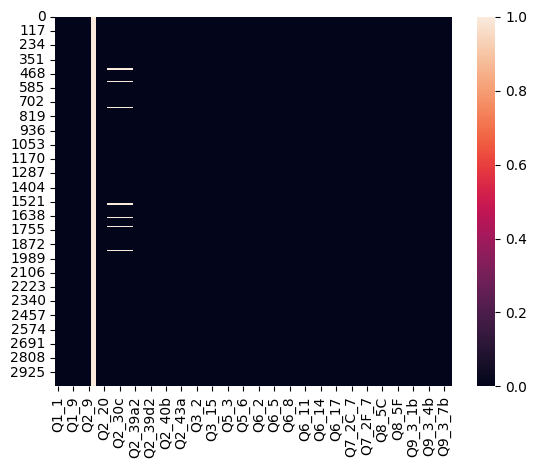

In [ ]:
sns.heatmap(df.isnull())


In [ ]:
df.dtypes

Q1_1         int64
Q1_2         int64
Q1_5         int64
Q1_9       float64
Q2_3       float64
            ...   
Q9_3_4b    float64
Q9_3_5b    float64
Q9_3_6b    float64
Q9_3_7b    float64
Q9_3_8b    float64
Length: 77, dtype: object

In [ ]:
df_cleaned = df

In [ ]:
df_cleaned.head()

,Q1_1,Q1_2,Q1_5,Q1_9,Q2_3,Q2_8,Q2_9,Q2_18_j,Q2_19,Q2_20,...,Q8_5G,Q9_2A,Q9_3_1b,Q9_3_2b,Q9_3_3b,Q9_3_4b,Q9_3_5b,Q9_3_6b,Q9_3_7b,Q9_3_8b
0,1,10,230,154.0,50.0,4.0,1.0,NaN,1.0,1.0,...,9200.0,180000.0,20000.0,160000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,10,230,154.0,35.0,7.0,2.0,NaN,2.0,1.0,...,2150.0,64000.0,7000.0,57000.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,10,230,152.0,22.0,1.0,1.0,NaN,2.0,2.0,...,475.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,10,204,190.0,34.0,6.0,2.0,NaN,1.0,1.0,...,800.0,10000.0,2000.0,8000.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,10,204,195.0,42.0,4.0,1.0,NaN,2.0,2.0,...,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
[i for i in df_cleaned.columns if df_cleaned[i].isnull().sum()>0]


['Q1_9',
 'Q2_3',
 'Q2_8',
 'Q2_9',
 'Q2_18_j',
 'Q2_19',
 'Q2_20',
 'Q2_30a',
 'Q2_30b',
 'Q2_30c',
 'Q2_30d',
 'Q2_30e',
 'Q2_39a2',
 'Q2_39b2',
 'Q2_39c2',
 'Q2_39d2',
 'Q2_39e2',
 'Q2_40a',
 'Q2_40b',
 'Q2_40c',
 'Q2_42',
 'Q2_43a',
 'Q2_43b',
 'Q2_43c',
 'Q3_2',
 'Q3_5',
 'Q3_6',
 'Q3_15',
 'Q3_20',
 'Q5_2',
 'Q5_3',
 'Q5_4',
 'Q5_5',
 'Q5_6',
 'Q5_7',
 'Q5_8',
 'Q6_2',
 'Q6_3',
 'Q6_4',
 'Q6_5',
 'Q6_6',
 'Q6_7',
 'Q6_8',
 'Q6_9',
 'Q6_10',
 'Q6_11',
 'Q6_12',
 'Q6_13',
 'Q6_14',
 'Q6_15',
 'Q6_16',
 'Q6_17',
 'Q7_2A_7',
 'Q7_2B_7',
 'Q7_2C_7',
 'Q7_2D_7',
 'Q7_2E_7',
 'Q7_2F_7',
 'Q8_5A',
 'Q8_5B',
 'Q8_5C',
 'Q8_5D',
 'Q8_5E',
 'Q8_5F',
 'Q8_5G',
 'Q9_2A',
 'Q9_3_1b',
 'Q9_3_2b',
 'Q9_3_3b',
 'Q9_3_4b',
 'Q9_3_5b',
 'Q9_3_6b',
 'Q9_3_7b',
 'Q9_3_8b']

In [ ]:
df_cleaned['Q6_2']

0       422000.0
1       208000.0
2       103000.0
3        21000.0
4        95000.0
          ...   
3036     75000.0
3037    229000.0
3038     65000.0
3039    583000.0
3040         NaN
Name: Q6_2, Length: 3041, dtype: float64

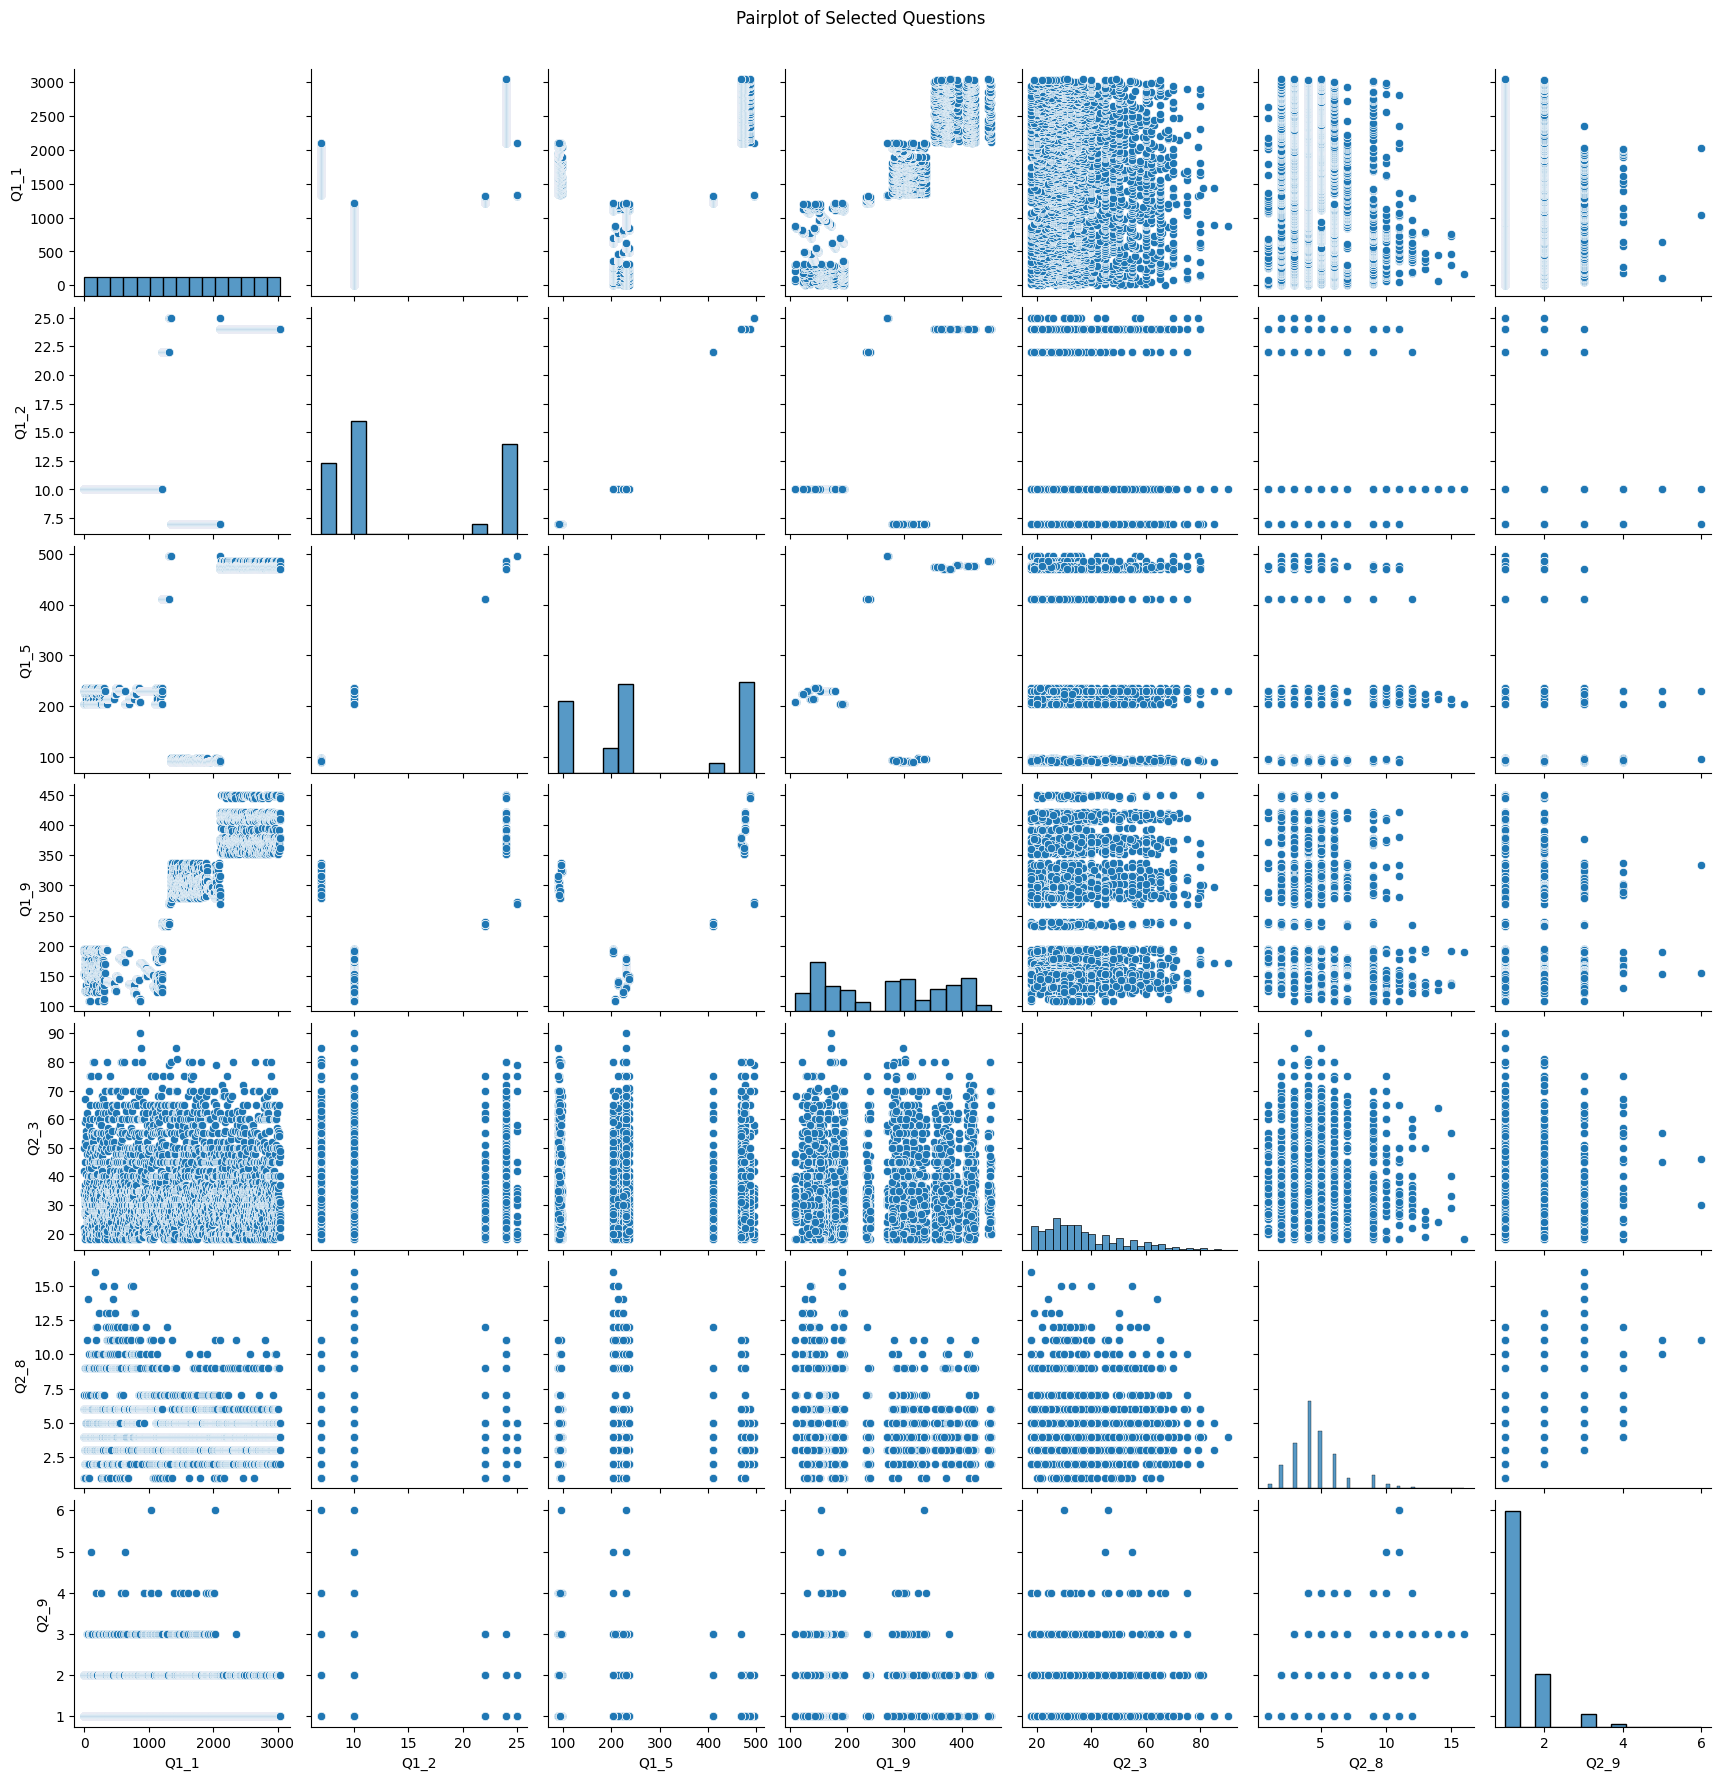

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a subset of columns for visualization to avoid overloading with too many variables
subset_columns = ['Q1_1', 'Q1_2', 'Q1_5', 'Q1_9', 'Q2_3', 'Q2_8', 'Q2_9']
df_subset = df[subset_columns]

# Pairplot to visualize relationships between these variables
sns.pairplot(df_subset)
plt.suptitle('Pairplot of Selected Questions', y=1.02)
plt.show()

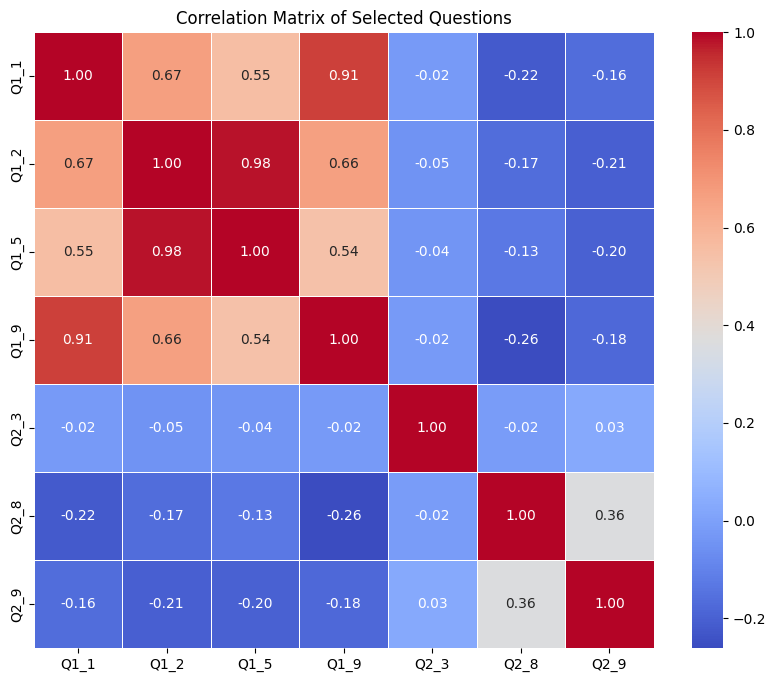

In [ ]:
# Correlation matrix for the selected subset of columns
corr = df_subset.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Selected Questions')
plt.show()

In [ ]:
df = df.iloc[10:]


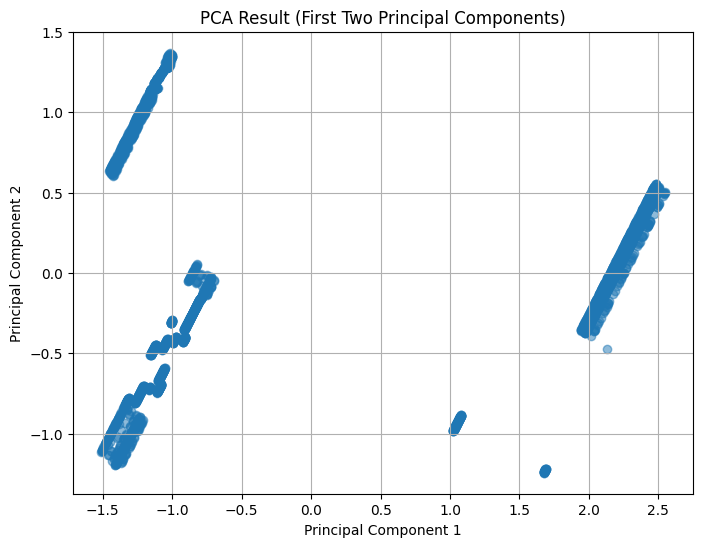

In [ ]:
from sklearn.decomposition import PCA

# Selecting numerical columns for PCA
numerical_columns = df.select_dtypes(include=['int64']).columns
df_numerical = df[numerical_columns]

# Handling missing values by filling with the median of each column
df_numerical = df_numerical.fillna(df_numerical.median())

# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Applying PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA Result (First Two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
# Checking for non-finite values in the DataFrame
df.isna().sum()

In [ ]:
import pandas as pd

df = df

# Display the percentage of missing values in each column so that we can drop
missing_data = df.isnull().sum() / len(df) * 100

print('Percentage of missing values per column:')
print(missing_data)

Percentage of missing values per column:
Q1_1       0.000000
Q1_2       0.000000
Q1_5       0.000000
Q1_9       0.032992
Q2_3       0.032992
             ...   
Q9_3_4b    0.032992
Q9_3_5b    0.032992
Q9_3_6b    0.032992
Q9_3_7b    0.032992
Q9_3_8b    0.032992
Length: 77, dtype: float64


In [ ]:
# Remove columns with more than 80% missing values
columns_to_drop = missing_data[missing_data > 80].index
df.drop(columns=columns_to_drop, inplace=True)

# Display the updated dataframe
print('Columns with more than 80% missing values have been removed.')
print('Remaining columns:')
print(df.columns)

Columns with more than 80% missing values have been removed.
Remaining columns:
Index(['Q1_1', 'Q1_2', 'Q1_5', 'Q1_9', 'Q2_3', 'Q2_8', 'Q2_9', 'Q2_19',
       'Q2_20', 'Q2_30a', 'Q2_30b', 'Q2_30c', 'Q2_30d', 'Q2_30e', 'Q2_39a2',
       'Q2_39b2', 'Q2_39c2', 'Q2_39d2', 'Q2_39e2', 'Q2_40a', 'Q2_40b',
       'Q2_40c', 'Q2_42', 'Q2_43a', 'Q2_43b', 'Q2_43c', 'Q3_2', 'Q3_5', 'Q3_6',
       'Q3_15', 'Q3_20', 'Q5_2', 'Q5_3', 'Q5_4', 'Q5_5', 'Q5_6', 'Q5_7',
       'Q5_8', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9',
       'Q6_10', 'Q6_11', 'Q6_12', 'Q6_13', 'Q6_14', 'Q6_15', 'Q6_16', 'Q6_17',
       'Q7_2A_7', 'Q7_2B_7', 'Q7_2C_7', 'Q7_2D_7', 'Q7_2E_7', 'Q7_2F_7',
       'Q8_5A', 'Q8_5B', 'Q8_5C', 'Q8_5D', 'Q8_5E', 'Q8_5F', 'Q8_5G', 'Q9_2A',
       'Q9_3_1b', 'Q9_3_2b', 'Q9_3_3b', 'Q9_3_4b', 'Q9_3_5b', 'Q9_3_6b',
       'Q9_3_7b', 'Q9_3_8b'],
      dtype='object')


<ipython-input-37-26452e8e7bd8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
print(df.columns)

Index(['Q1_1', 'Q1_2', 'Q1_5', 'Q1_9', 'Q2_3', 'Q2_8', 'Q2_9', 'Q2_19',
       'Q2_20', 'Q2_30a', 'Q2_30b', 'Q2_30c', 'Q2_30d', 'Q2_30e', 'Q2_39a2',
       'Q2_39b2', 'Q2_39c2', 'Q2_39d2', 'Q2_39e2', 'Q2_40a', 'Q2_40b',
       'Q2_40c', 'Q2_42', 'Q2_43a', 'Q2_43b', 'Q2_43c', 'Q3_2', 'Q3_5', 'Q3_6',
       'Q3_15', 'Q3_20', 'Q5_2', 'Q5_3', 'Q5_4', 'Q5_5', 'Q5_6', 'Q5_7',
       'Q5_8', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9',
       'Q6_10', 'Q6_11', 'Q6_12', 'Q6_13', 'Q6_14', 'Q6_15', 'Q6_16', 'Q6_17',
       'Q7_2A_7', 'Q7_2B_7', 'Q7_2C_7', 'Q7_2D_7', 'Q7_2E_7', 'Q7_2F_7',
       'Q8_5A', 'Q8_5B', 'Q8_5C', 'Q8_5D', 'Q8_5E', 'Q8_5F', 'Q8_5G', 'Q9_2A',
       'Q9_3_1b', 'Q9_3_2b', 'Q9_3_3b', 'Q9_3_4b', 'Q9_3_5b', 'Q9_3_6b',
       'Q9_3_7b', 'Q9_3_8b'],
      dtype='object')


In [ ]:

df.fillna(0, inplace=True)


<ipython-input-48-a616889d5bf1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


In [ ]:
import pandas as pd


threshold = 50000

# Use a lambda function to apply the condition, handling None values
df['financial_crisis'] = df['Q2_40a'].apply(lambda x: 1 if x is not None and x < threshold else 0)

# Display the first few rows to verify the new column
print(df[['Q2_40a', 'financial_crisis']].head())


    Q2_40a  financial_crisis
10    30.0                 1
11    15.0                 1
12    30.0                 1
13    25.0                 1
14    10.0                 1


<ipython-input-49-d8b8a420cd42>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['financial_crisis'] = df['Q2_40a'].apply(lambda x: 1 if x is not None and x < threshold else 0)


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X = df.drop('financial_crisis', axis=1)  # Features
y = df['financial_crisis']  # Target

# Split the data with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets to confirm the split
print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (2424, 76)
Testing set shape: (607, 76)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'X_train' and 'X_test' are DataFrames and 'y_train' and 'y_test' are Series
categorical_columns = []

# Use OneHotEncoder to convert categorical columns into numeric
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# Initialize the Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the model:', accuracy)


Accuracy of the model: 1.0
